In [1]:
import numpy as np
import astropy as ap
import matplotlib.pyplot as plt
import math as m
import pandas as pd
import numpy as np
import astropy as ap
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math as m
import argparse
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.modeling.models import custom_model
from matplotlib.backends.backend_pdf import PdfPages
import scipy as sp
import uncertainties as unc
import uncertainties
from uncertainties import unumpy as unp
import kcorrect
import kcorrect.utils as ut
from astropy.cosmology import FlatLambdaCDM
import pandas as pd
import matplotlib as mp
import os

In [2]:
CATALOG=pd.read_csv('/home/lrhunt/Astrodata/LCBG_Luminosity_Function/Original_Catalogs/Final_Catalogs/COSMOS_CONVERTED_CATALOG.csv')

subaru_B_mag
subaru_V_mag
subaru_r_mag
subaru_i_mag
subaru_z_mag


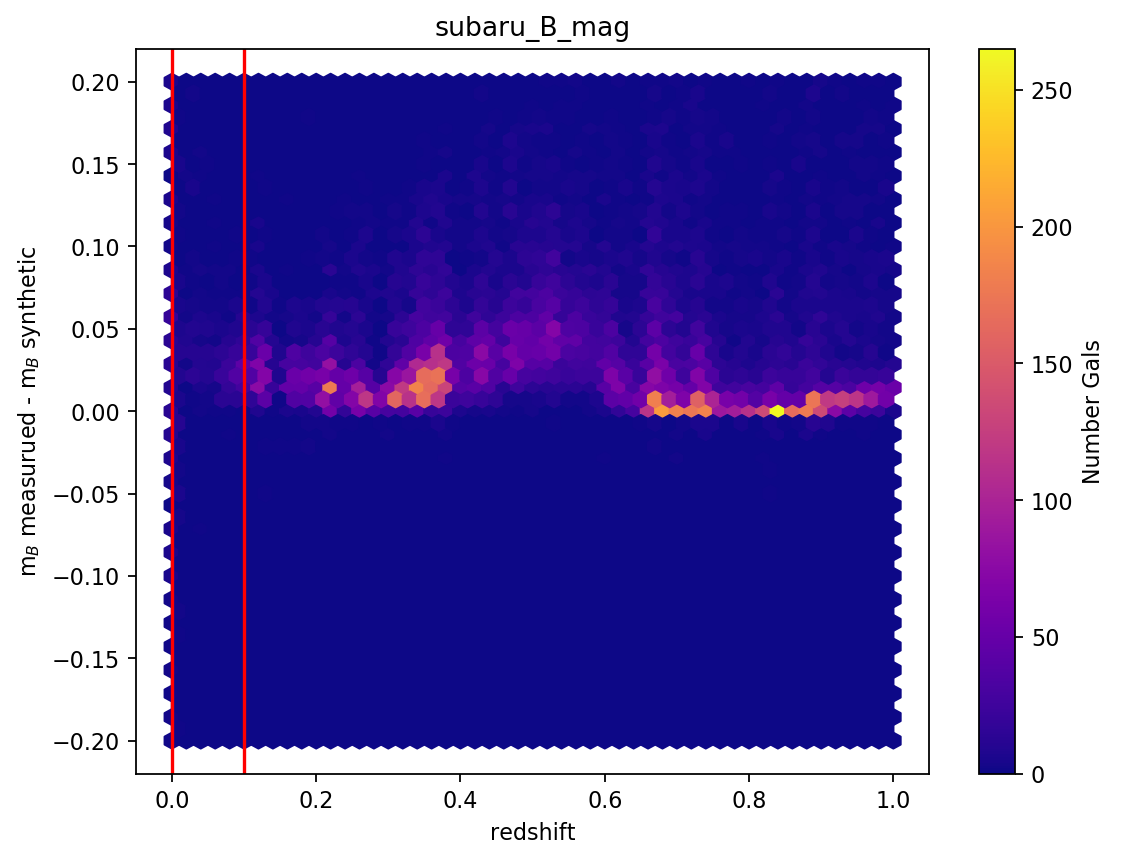

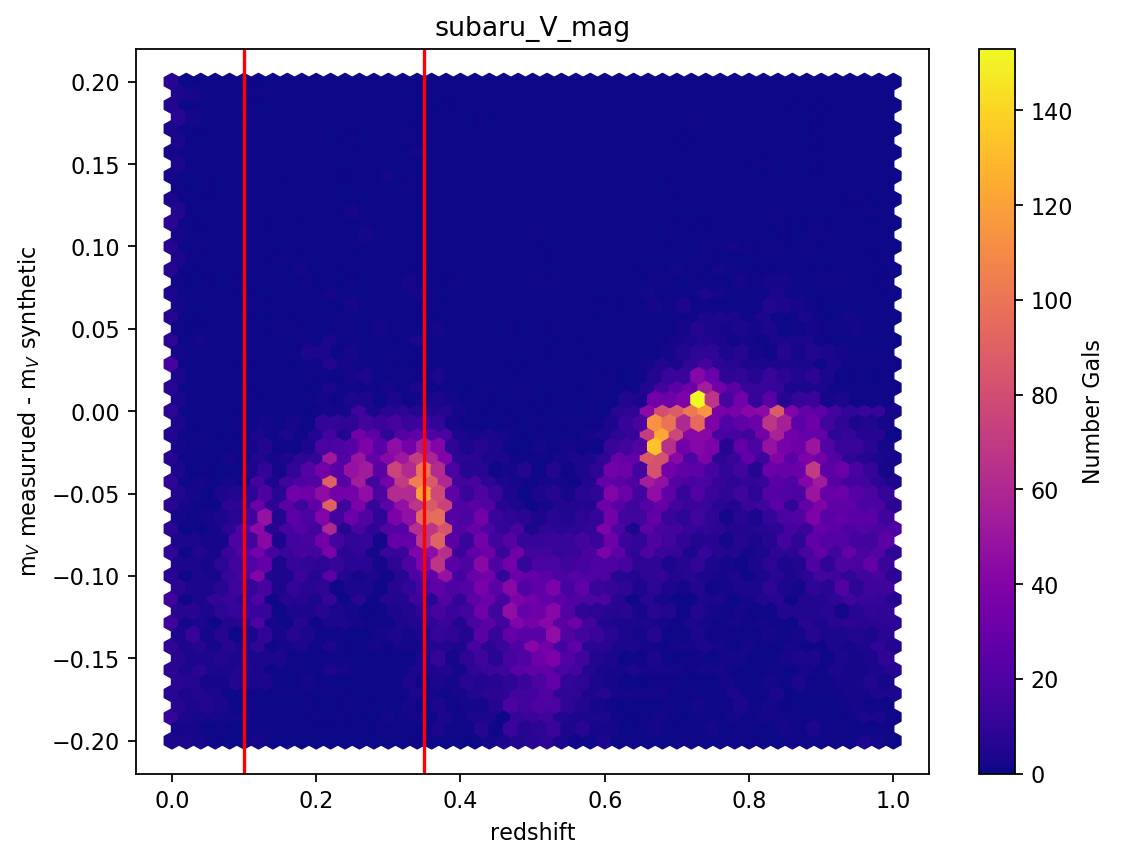

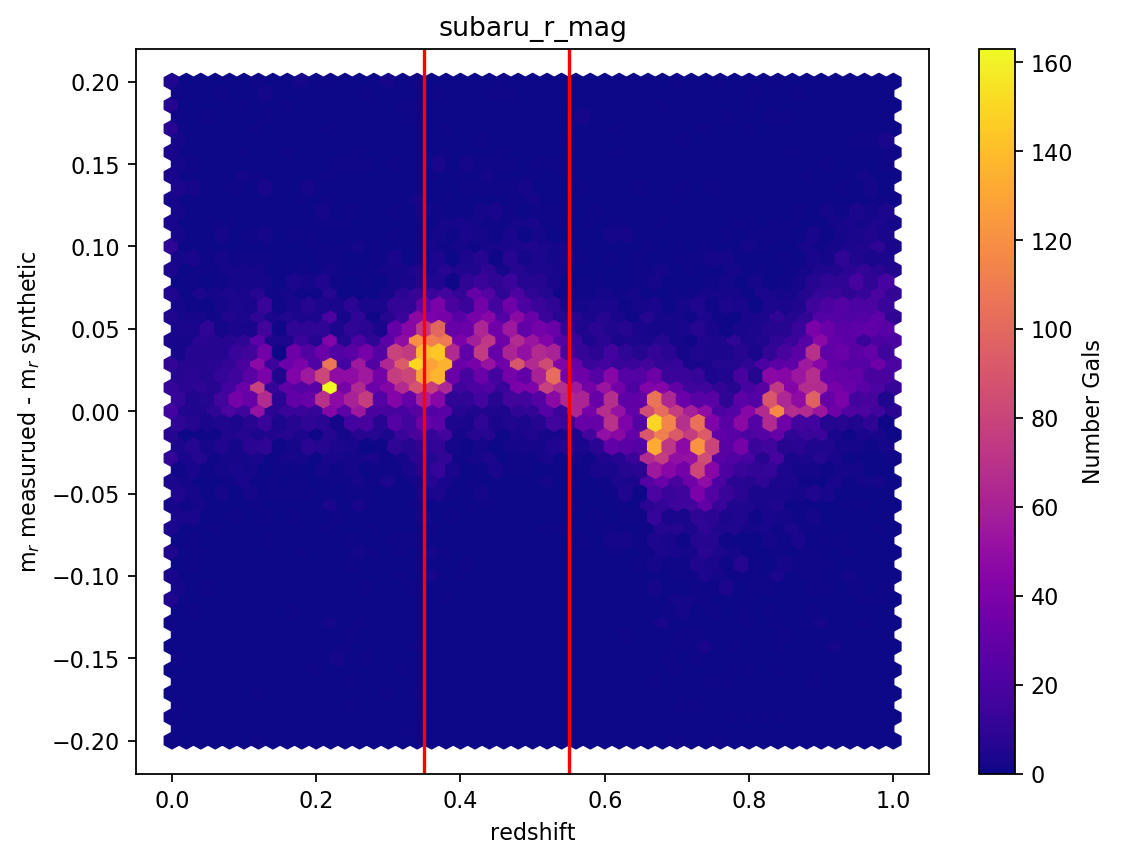

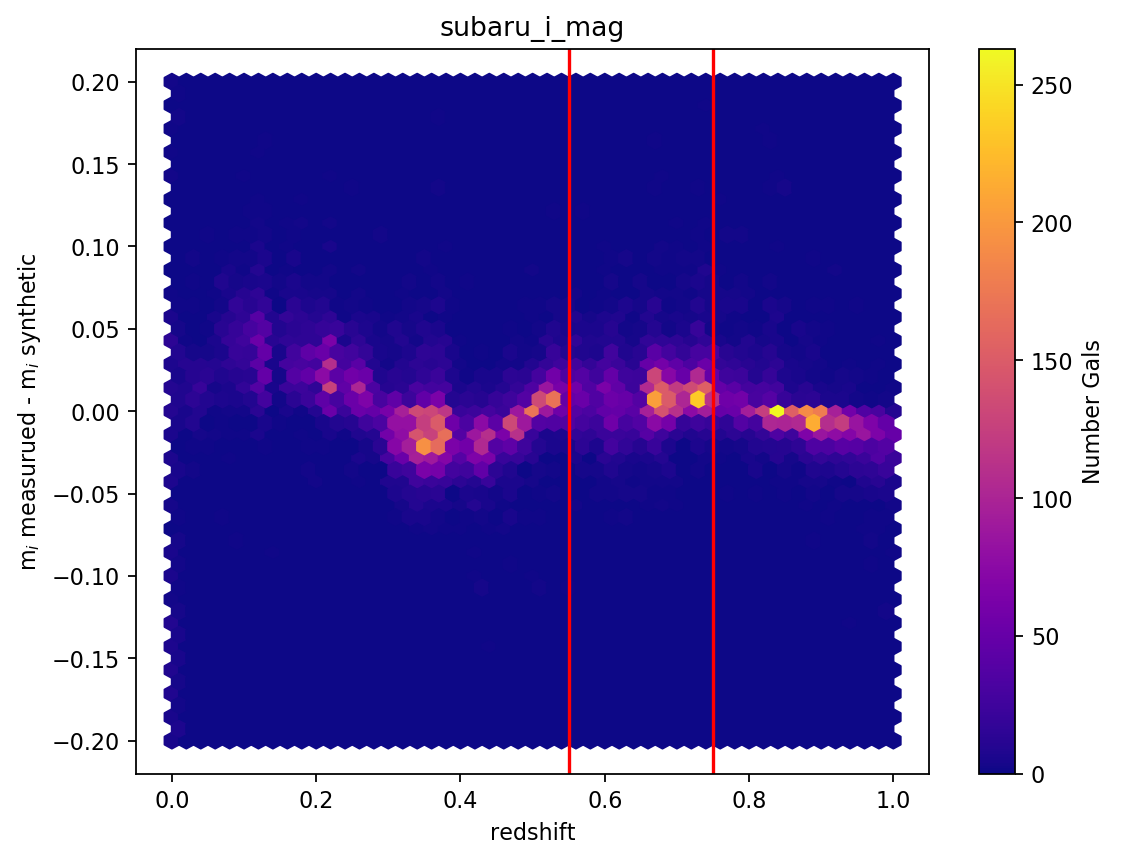

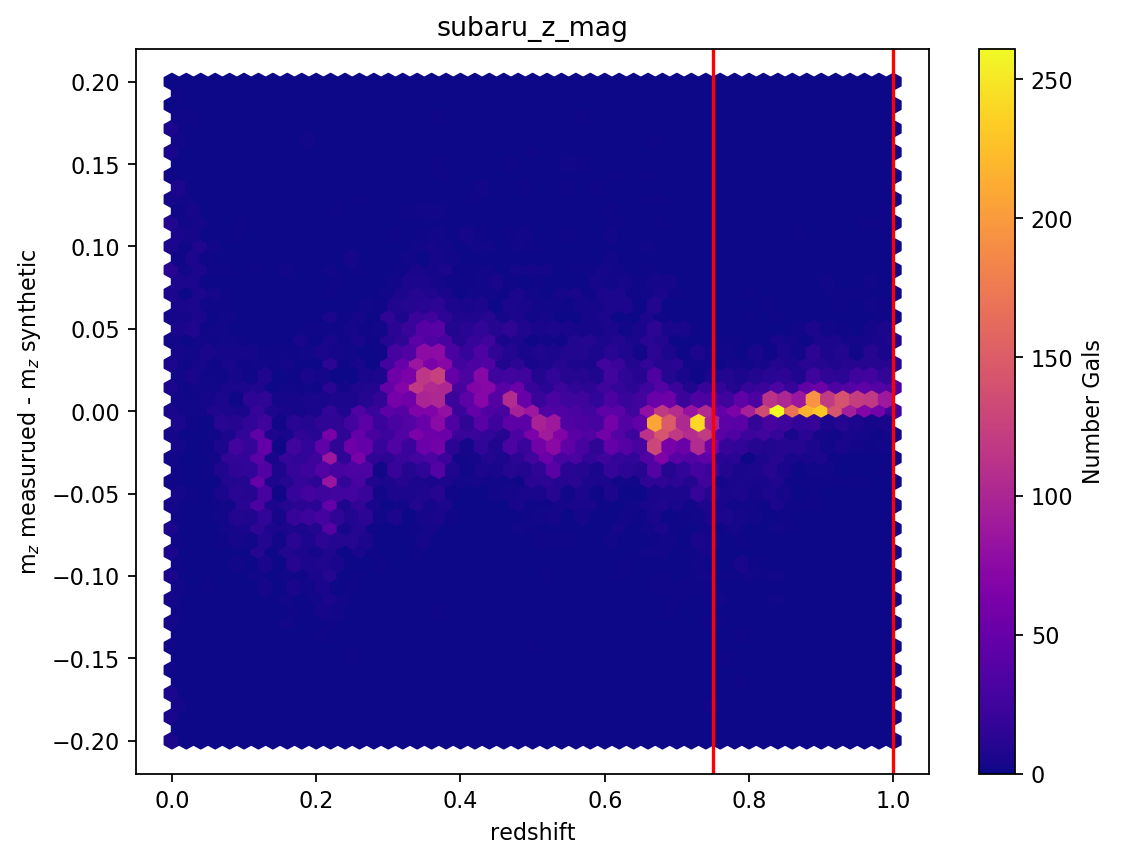

In [3]:
z_range_dict_low={'subaru_B_mag':0.0,
                  'subaru_V_mag':0.1,
                  'subaru_r_mag':0.35,
                  'subaru_i_mag':0.55,
                  'subaru_z_mag':0.75}
z_range_dict_high={'subaru_B_mag':0.1,
                   'subaru_V_mag':0.35,
                   'subaru_r_mag':0.55,
                   'subaru_i_mag':0.75,
                   'subaru_z_mag':1.0}
for i in [f for f in CATALOG.columns.values if ('_mag' in f) & ('subaru_' in f) & ('err' not in f) & ('synthetic' not in f) & ('ia' not in f) & ('nb' not in f) & ('_g' not in f) & (f.endswith('mag'))]:
    print(i)
    fig=plt.figure(figsize=(8,6),dpi=160)
    plt.hexbin(CATALOG.loc[CATALOG.Z_USE<3]['Z_BEST'],
               CATALOG.loc[CATALOG.Z_USE<3][i]-CATALOG.loc[CATALOG.Z_USE<3][i.split('_mag')[0]+'_synthetic_mag'],
               gridsize=50,
               cmap='plasma',
               extent=[0,1,-0.2,0.2])
    plt.axvline(x=z_range_dict_low[i],color='red')
    plt.axvline(x=z_range_dict_high[i],color='red')
    plt.ylabel('m$_{}$ measurued - m$_{}$ synthetic'.format(i.split('_')[1],i.split('_')[1]))
    plt.xlabel('redshift')
    plt.title(i)
    cb=plt.colorbar()
    cb.set_label('Number Gals')

subaru_B_mag
subaru_V_mag
subaru_r_mag
subaru_i_mag
subaru_z_mag


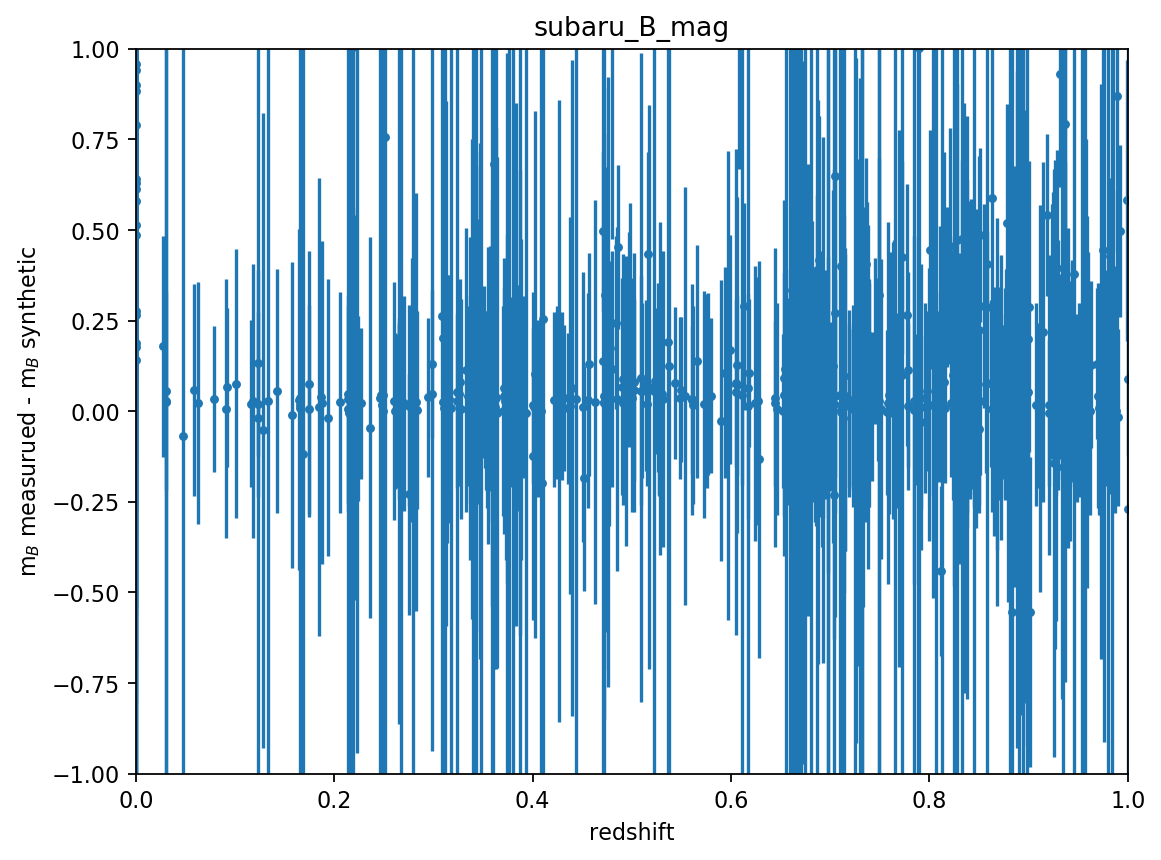

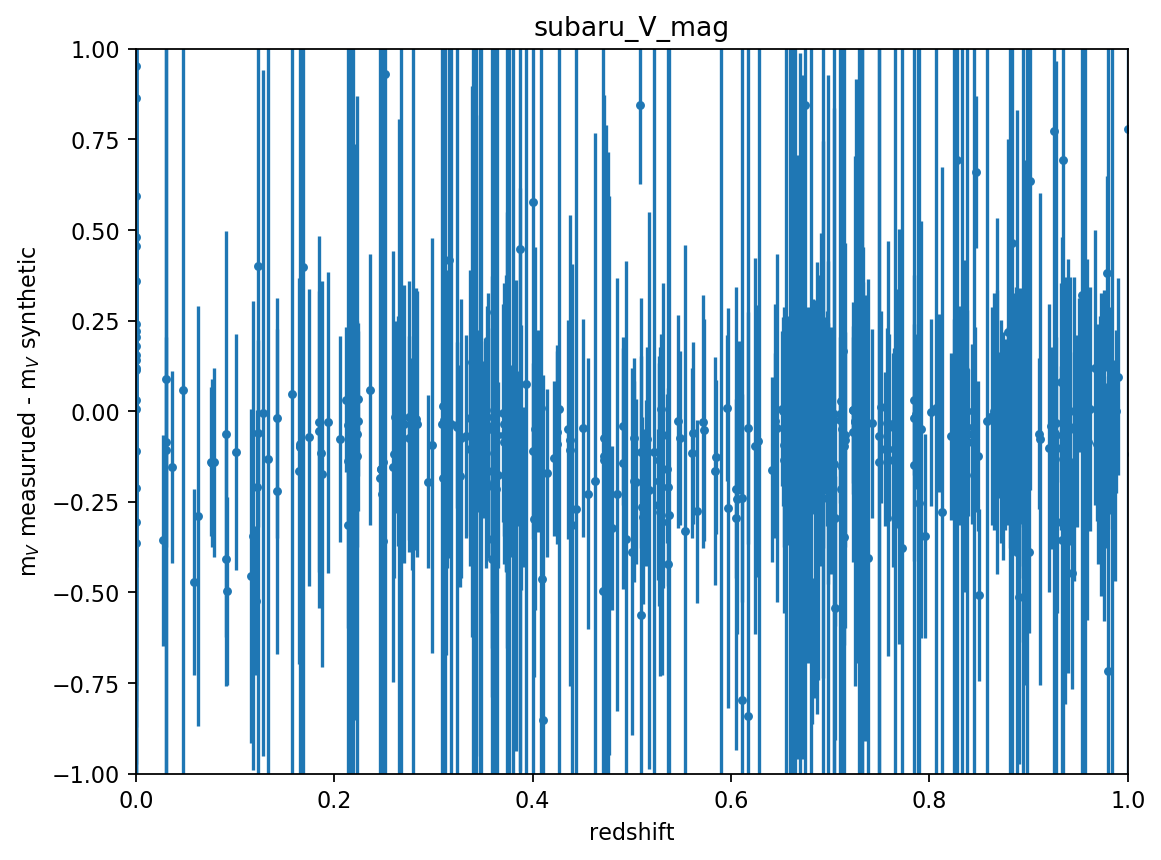

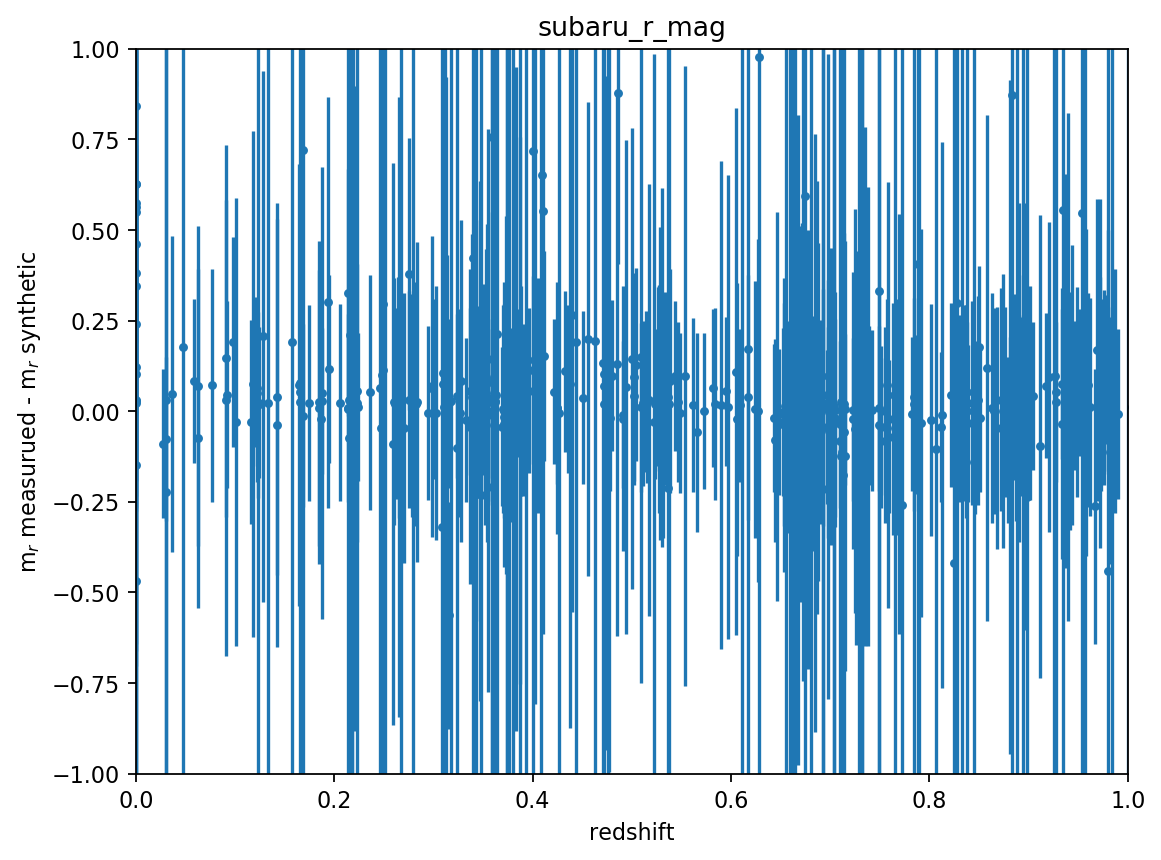

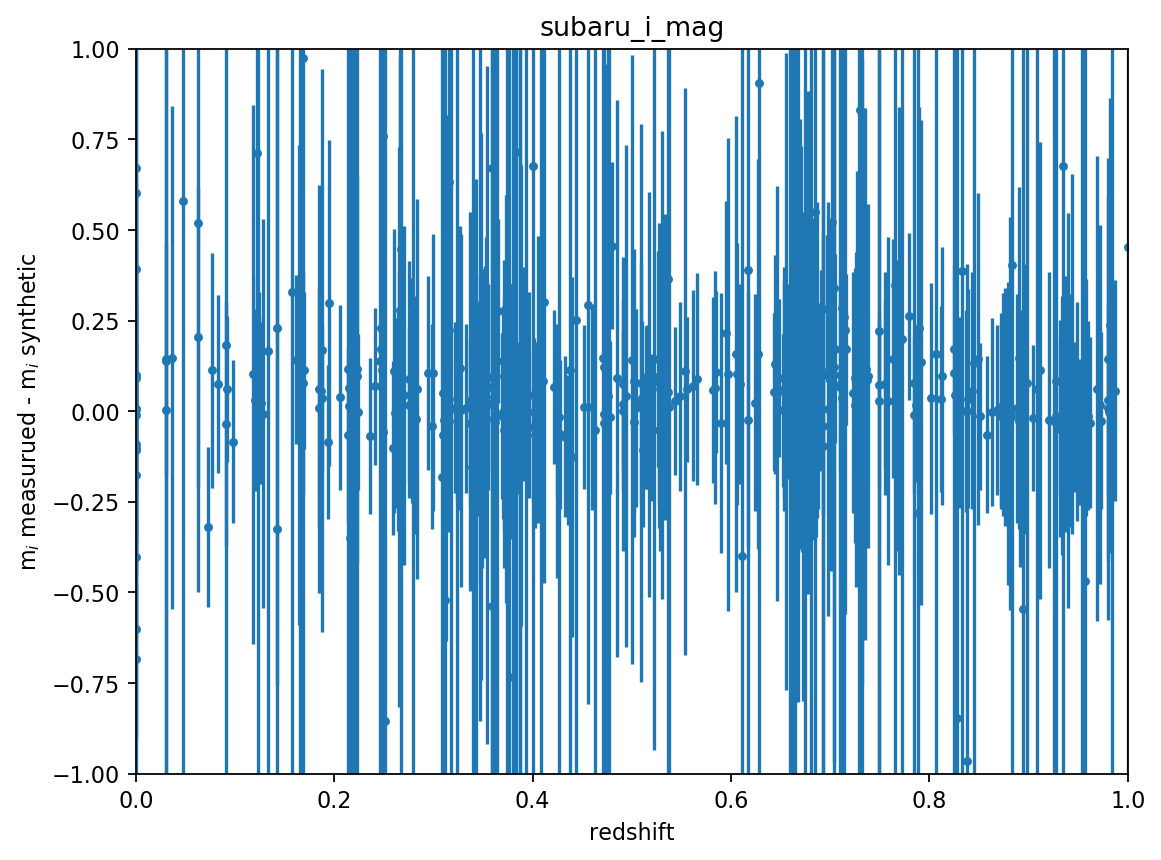

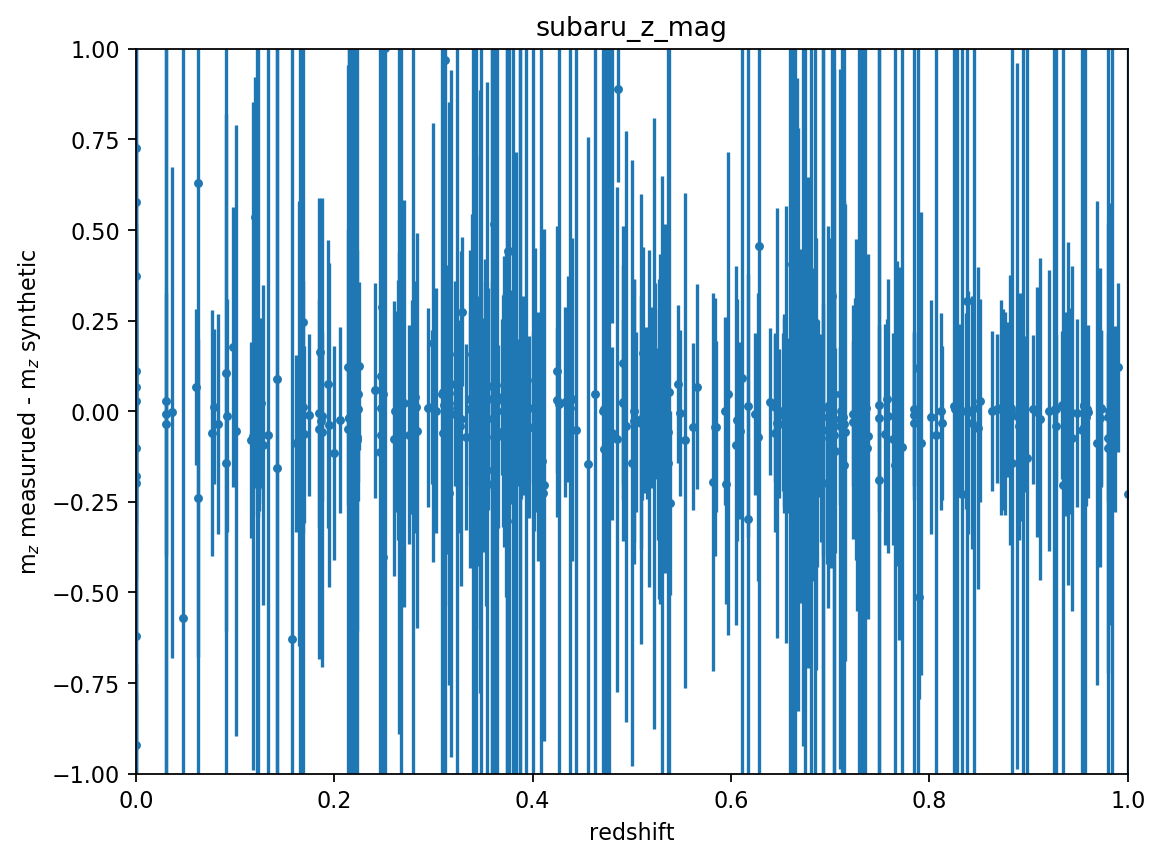

In [4]:
for i in [f for f in CATALOG.columns.values if ('_mag' in f) & ('subaru_' in f) & ('err' not in f) & ('synthetic' not in f) & ('ia' not in f) & ('nb' not in f) & ('_g' not in f) & (f.endswith('mag'))]:
    print(i)
    plt.figure(figsize=(8,6),dpi=160)
    plt.errorbar(CATALOG.loc[(CATALOG.Z_USE<3) & (CATALOG[i+'_err']>0.2)]['Z_BEST'],
                 (CATALOG.loc[(CATALOG.Z_USE<3) & (CATALOG[i+'_err']>0.2)][i]
                  -CATALOG.loc[(CATALOG.Z_USE<3) & (CATALOG[i+'_err']>0.2)][i.split('_mag')[0]+'_synthetic_mag']),
                 yerr=CATALOG.loc[(CATALOG.Z_USE<3) & (CATALOG[i+'_err']>0.2)][i+'_err'],
                 fmt='.')
    plt.ylim(-1,1)
    plt.xlim(0,1)
    plt.ylabel('m$_{}$ measurued - m$_{}$ synthetic'.format(i.split('_')[1],i.split('_')[1]))
    plt.xlabel('redshift')
    plt.title(i)

In [5]:
GALS_0_25=CATALOG.loc[(CATALOG.Z_USE<3)&(CATALOG.Z_BEST<=0.25)&(CATALOG.Z_BEST>0.01)].sample(n=700)
GALS_25_50=CATALOG.loc[(CATALOG.Z_USE<3)&(CATALOG.Z_BEST<=0.5)&(CATALOG.Z_BEST>0.25)].sample(n=700)
GALS_50_75=CATALOG.loc[(CATALOG.Z_USE<3)&(CATALOG.Z_BEST<=0.75)&(CATALOG.Z_BEST>0.5)].sample(n=700)
GALS_75_100=CATALOG.loc[(CATALOG.Z_USE<3)&(CATALOG.Z_BEST<=1.0)&(CATALOG.Z_BEST>0.75)].sample(n=700)

In [6]:
df_list=[GALS_0_25,GALS_25_50,GALS_50_75,GALS_75_100]
z_range_list=['z=0.01-0.25','z=0.25-0.5','z=0.5-0.75','z=0.75-1.0']

In [7]:
SBy=np.linspace(16,21,30)
SBx=np.full_like(SBy,0.6)
bvx=np.linspace(-.5,.6,30)
bvy=np.full_like(bvx,-18.5)
My=np.linspace(-18.5,-25,30)
Mx=np.full_like(My,0.6)
print(SBx,SBy)

[0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6
 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6] [16.         16.17241379 16.34482759 16.51724138 16.68965517 16.86206897
 17.03448276 17.20689655 17.37931034 17.55172414 17.72413793 17.89655172
 18.06896552 18.24137931 18.4137931  18.5862069  18.75862069 18.93103448
 19.10344828 19.27586207 19.44827586 19.62068966 19.79310345 19.96551724
 20.13793103 20.31034483 20.48275862 20.65517241 20.82758621 21.        ]


In [8]:
GAL_BIAS_CUTOFF={z_range_list[0]:-17,
                 z_range_list[1]:-19,
                 z_range_list[2]:-20,
                 z_range_list[3]:-20.5}

/home/lrhunt/programs/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


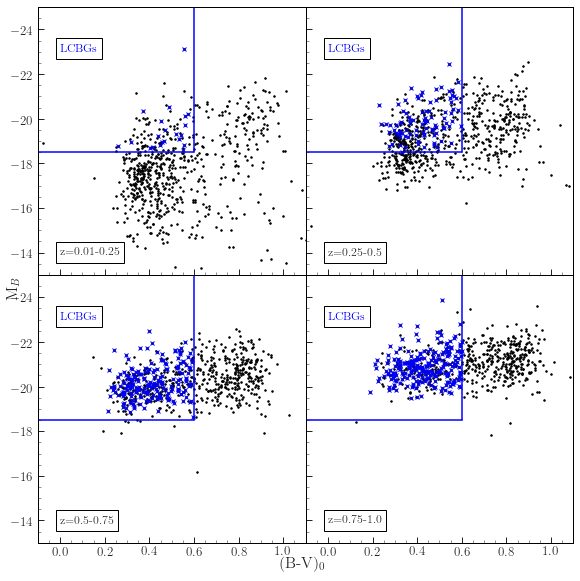

In [9]:
#Original Plot (Absolute Magnitude on Y-Axis like Katie's)

plt.style.use('seaborn-whitegrid')
#plt.style.use('default')
params = {
    'axes.labelsize': 14,
    'legend.fontsize': 12,
    'xtick.labelsize': 13,
    'xtick.minor.visible':True,
    'xtick.minor.size':2,
    'xtick.major.size':3,
    'ytick.minor.visible':True,
    'ytick.labelsize': 13,
    'ytick.minor.size':2,
    'ytick.major.size':3,
    'text.usetex': True,
    'figure.figsize': [7, 4], # instead of 4.5, 4.5
    'grid.linestyle': ':',
    'axes.edgecolor' : '0',
    'font.family':'serif',
    'font.serif':'Computer Modern'
    }
mp.rcParams.update(params)

f,axes=plt.subplots(nrows=2,ncols=2,sharex=True,sharey=True,figsize=(8,8))
for i, ax in enumerate(f.axes):
    ax.plot(df_list[i]['rest_frame_B-V'],
            df_list[i]['BJ0_vega_absmag'],
            '.',markersize=3,color='black')
    ax.plot(df_list[i].loc[df_list[i].is_LCBG==1,
                           'rest_frame_B-V'],
            df_list[i].loc[df_list[i].is_LCBG==1,
                           'BJ0_vega_absmag'],
            'x',markersize=3.5,color='blue')
    plt.subplots_adjust(hspace=0,wspace=0)
    ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
    ax.set_xticks([-0.05,0.05,0.1,0.15,0.25,0.3,0.35,0.45,0.5,0.55,0.65,0.7,0.75,0.85,0.9,0.95,1.05],minor=True)
    ax.set_xlim([-0.1,1.1])
    ax.set_yticks([-24,-22,-20,-18,-16,-14])
    ax.set_yticks([-13.5,-14.5,-15,-15.5,-16.5,-17,-17.5,-18.5,-19,-19.5,-20.5,-21,-21.5,-22.5,-23,-23.5,-24.5],minor=True)
    ax.set_ylim([-13,-25])
    ax.plot(bvx,bvy,'b')
    ax.plot(Mx,My,'b')
    #ax.fill_between(bvx,21,16,facecolor='blue',alpha=0.1)
    ax.text(0,-23,'LCBGs',fontsize=12,color='blue',bbox={'facecolor':'white'})
    ax.text(0,-14,z_range_list[i],verticalalignment='center',fontsize=12,bbox={'facecolor':'white'})
    ax.grid(False)
    ax.tick_params(axis='both',which='major',direction='in',length=6,width=1)
    ax.tick_params(axis='both',which='minor',direction='in',length=3,width=0.5)

f.text(0.02,0.5,'M$_{B}$',ha='center',va='center',rotation='vertical',fontsize=16)
f.text(0.52,0.02,'(B-V)$_{0}$',ha='center',va='center',fontsize=16)
plt.subplots_adjust(left=0.06,right=0.99,top=0.99,bottom=0.06)

plt.savefig('/home/lrhunt/Projects/LCBG_LUMINOSITY_FUNCTION_PLOTTING/PLOTS/PAPER/MagnitudeColor_rabidoux.pdf')

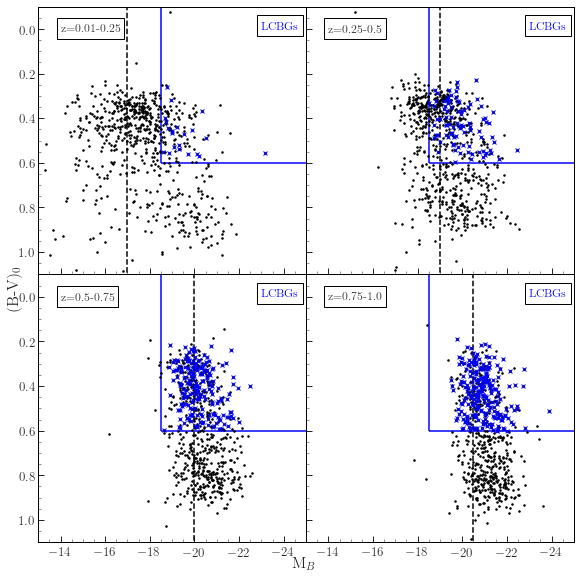

In [10]:
#Matt's Suggested Plot

plt.style.use('seaborn-whitegrid')
#plt.style.use('default')
params = {
    'axes.labelsize': 14,
    'legend.fontsize': 12,
    'xtick.labelsize': 13,
    'xtick.minor.visible':True,
    'xtick.minor.size':2,
    'xtick.major.size':3,
    'ytick.minor.visible':True,
    'ytick.labelsize': 13,
    'ytick.minor.size':2,
    'ytick.major.size':3,
    'text.usetex': True,
    'figure.figsize': [7, 4], # instead of 4.5, 4.5
    'grid.linestyle': ':',
    'axes.edgecolor' : '0',
    'font.family':'serif',
    'font.serif':'Computer Modern'
    }
mp.rcParams.update(params)

f,axes=plt.subplots(nrows=2,ncols=2,sharex=True,sharey=True,figsize=(8,8))
for i, ax in enumerate(f.axes):
    ax.plot(df_list[i]['BJ0_vega_absmag'],
            df_list[i]['rest_frame_B-V'],
            '.',markersize=3,color='black')
    ax.plot(df_list[i].loc[df_list[i].is_LCBG==1,
                           'BJ0_vega_absmag'],
            df_list[i].loc[df_list[i].is_LCBG==1,
                           'rest_frame_B-V'],
            'x',markersize=3.5,color='blue')
    plt.subplots_adjust(hspace=0,wspace=0)
    ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
    ax.set_yticks([-0.05,0.05,0.1,0.15,0.25,0.3,0.35,0.45,0.5,0.55,0.65,0.7,0.75,0.85,0.9,0.95,1.05],minor=True)
    ax.set_ylim([1.1,-0.1])
    ax.set_xticks([-24,-22,-20,-18,-16,-14])
    ax.set_xticks([-13.5,-14.5,-15,-15.5,-16.5,-17,-17.5,-18.5,-19,-19.5,-20.5,-21,-21.5,-22.5,-23,-23.5,-24.5],minor=True)
    ax.set_xlim([-13,-25])
    ax.hlines(0.6,-18.5,-25,color='blue')
    ax.vlines(-18.5,-0.1,0.6,color='blue')
    ax.vlines(GAL_BIAS_CUTOFF[z_range_list[i]],-1,30,linestyles='dashed')
    #ax.fill_between(bvx,21,16,facecolor='blue',alpha=0.1)
    ax.text(-23,0,'LCBGs',fontsize=12,color='blue',bbox={'facecolor':'white'})
    ax.text(-14,0,z_range_list[i],verticalalignment='center',fontsize=12,bbox={'facecolor':'white'})
    ax.grid(False)
    ax.tick_params(axis='both',which='major',direction='in',length=6,width=1)
    ax.tick_params(axis='both',which='minor',direction='in',length=3,width=0.5)

f.text(0.02,0.5,'(B-V)$_{0}$',ha='center',va='center',rotation='vertical',fontsize=16)
f.text(0.52,0.02,'M$_{B}$',ha='center',va='center',fontsize=16)
plt.subplots_adjust(left=0.06,right=0.99,top=0.99,bottom=0.06)

plt.savefig('/home/lrhunt/Projects/LCBG_LUMINOSITY_FUNCTION_PLOTTING/PLOTS/PAPER/MagnitudeColor.pdf')

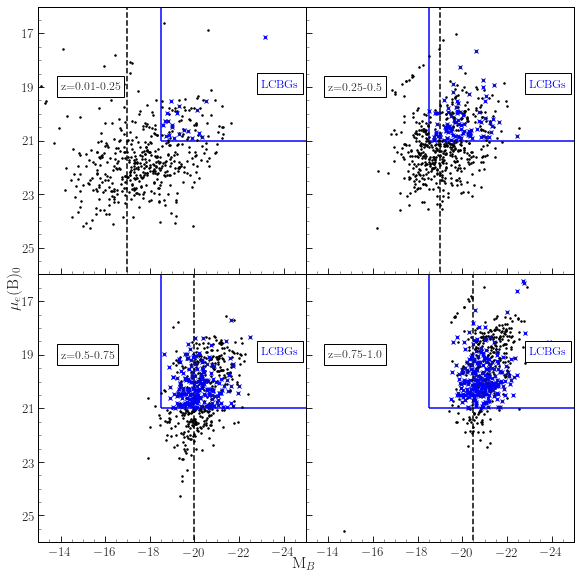

In [14]:
plt.style.use('seaborn-whitegrid')
#plt.style.use('default')
params = {
    'axes.labelsize': 14,
    'legend.fontsize': 12,
    'xtick.labelsize': 13,
    'xtick.minor.visible':True,
    'xtick.minor.size':2,
    'xtick.major.size':3,
    'ytick.minor.visible':True,
    'ytick.labelsize': 13,
    'ytick.minor.size':2,
    'ytick.major.size':3,
    'text.usetex': True,
    'figure.figsize': [7, 4], # instead of 4.5, 4.5
    'grid.linestyle': ':',
    'axes.edgecolor' : '0',
    'font.family':'serif',
    'font.serif':'Computer Modern'
    }
mp.rcParams.update(params)

f,axes=plt.subplots(nrows=2,ncols=2,sharex=True,sharey=True,figsize=(8,8))
for i, ax in enumerate(f.axes):
    ax.plot(df_list[i]['BJ0_vega_absmag'],
            df_list[i]['BJ0_vega_surface_brightness'],
            '.',markersize=3,color='black')
    ax.plot(df_list[i].loc[df_list[i].is_LCBG==1,
                           'BJ0_vega_absmag'],
            df_list[i].loc[df_list[i].is_LCBG==1,
                           'BJ0_vega_surface_brightness'],
            'x',markersize=3.5,color='blue')
    plt.subplots_adjust(hspace=0,wspace=0)
    ax.set_yticks([25,23,21,19,17])
    ax.set_yticks([16.5,17.5,18,18.5,19.5,20,20.5,21.5,22,22.5,23.5,24,24.5,25.5],minor=True)
    ax.set_ylim([26,16])
    ax.set_xticks([-24,-22,-20,-18,-16,-14])
    ax.set_xticks([-13.5,-14.5,-15,-15.5,-16.5,-17,-17.5,-18.5,-19,-19.5,-20.5,-21,-21.5,-22.5,-23,-23.5,-24.5],minor=True)
    ax.set_xlim([-13,-25])
    ax.hlines(21,-18.5,-25,color='blue')
    ax.vlines(-18.5,16,21,color='blue')
    ax.vlines(GAL_BIAS_CUTOFF[z_range_list[i]],-0.1,30,linestyles='dashed')
    ax.fill_between(bvx,21,16,facecolor='blue',alpha=0.1)
    ax.text(-23,19,'LCBGs',fontsize=12,color='blue',bbox={'facecolor':'white'})
    ax.text(-14,19,z_range_list[i],verticalalignment='center',fontsize=12,bbox={'facecolor':'white'})
    ax.grid(False)
    ax.tick_params(axis='both',which='major',direction='in',length=6,width=1)
    ax.tick_params(axis='both',which='minor',direction='in',length=3,width=0.5)

f.text(0.02,0.5,'$\mu_{e}$(B)$_{0}$',ha='center',va='center',rotation='vertical',fontsize=16)
f.text(0.52,0.02,'M$_{B}$',ha='center',va='center',fontsize=16)
plt.subplots_adjust(left=0.06,right=0.99,top=0.99,bottom=0.06)

plt.savefig('/home/lrhunt/Projects/LCBG_LUMINOSITY_FUNCTION_PLOTTING/PLOTS/PAPER/MagnitudeSurfaceBrightness.pdf')

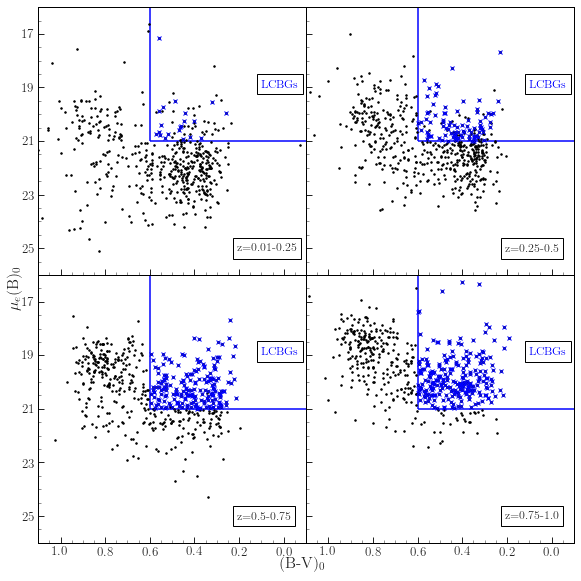

In [13]:
plt.style.use('seaborn-whitegrid')
#plt.style.use('default')
params = {
    'axes.labelsize': 14,
    'legend.fontsize': 12,
    'xtick.labelsize': 13,
    'xtick.minor.visible':True,
    'xtick.minor.size':2,
    'xtick.major.size':3,
    'ytick.minor.visible':True,
    'ytick.labelsize': 13,
    'ytick.minor.size':2,
    'ytick.major.size':3,
    'text.usetex': True,
    'figure.figsize': [7, 4], # instead of 4.5, 4.5
    'grid.linestyle': ':',
    'axes.edgecolor' : '0',
    'font.family':'serif',
    'font.serif':'Computer Modern'
    }
mp.rcParams.update(params)

f,axes=plt.subplots(nrows=2,ncols=2,sharex=True,sharey=True,figsize=(8,8))
for i, ax in enumerate(f.axes):
    ax.plot(df_list[i]['rest_frame_B-V'],
            df_list[i]['BJ0_vega_surface_brightness'],
            '.',markersize=3,color='black')
    ax.plot(df_list[i].loc[df_list[i].is_LCBG==1,
                           'rest_frame_B-V'],
            df_list[i].loc[df_list[i].is_LCBG==1,
                           'BJ0_vega_surface_brightness'],
            'x',markersize=3.5,color='blue')
    plt.subplots_adjust(hspace=0,wspace=0)
    ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
    ax.set_xticks([-0.05,0.05,0.1,0.15,0.25,0.3,0.35,0.45,0.5,0.55,0.65,0.7,0.75,0.85,0.9,0.95,1.05],minor=True)
    ax.set_xlim([1.1,-0.1])
    ax.set_yticks([25,23,21,19,17])
    ax.set_yticks([16.5,17.5,18,18.5,19.5,20,20.5,21.5,22,22.5,23.5,24,24.5,25.5],minor=True)
    ax.set_ylim([26,16])
    ax.hlines(21,-0.1,0.6,color='blue')
    ax.vlines(0.6,16,21,color='blue')
    #ax.fill_between(bvx,21,16,facecolor='blue',alpha=0.1)
    ax.text(0.1,19,'LCBGs',fontsize=12,color='blue',bbox={'facecolor':'white'})
    ax.text(0.21,25,z_range_list[i],verticalalignment='center',fontsize=12,bbox={'facecolor':'white'})
    ax.grid(False)
    ax.tick_params(axis='both',which='major',direction='in',length=6,width=1)
    ax.tick_params(axis='both',which='minor',direction='in',length=3,width=0.5)

f.text(0.02,0.5,'$\mu_{e}$(B)$_{0}$',ha='center',va='center',rotation='vertical',fontsize=16)
f.text(0.52,0.02,'(B-V)$_{0}$',ha='center',va='center',fontsize=16)
plt.subplots_adjust(left=0.06,right=0.99,top=0.99,bottom=0.06)

plt.savefig('/home/lrhunt/Projects/LCBG_LUMINOSITY_FUNCTION_PLOTTING/PLOTS/PAPER/SurfaceBrightnessColor.pdf')